# Machine learning Modeling

## Data Processing

In [29]:
import pandas as pd

df = pd.read_csv('./Data/df_final.csv')
df.shape

(97907, 38)

* delivered된 order만 사용
    * canceled 된 데이터 7개의 행 삭제
* time data로 dtype 변환

In [30]:
df_delivered = df[df["order_status"] == "delivered"]
df_delivered.shape

(97900, 38)

In [31]:
df_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97900 entries, 0 to 97906
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97900 non-null  object 
 1   customer_id                    97900 non-null  object 
 2   order_status                   97900 non-null  object 
 3   order_purchase_timestamp       97900 non-null  object 
 4   order_approved_at              97900 non-null  object 
 5   order_delivered_carrier_date   97900 non-null  object 
 6   order_delivered_customer_date  97900 non-null  object 
 7   order_estimated_delivery_date  97900 non-null  object 
 8   estimate_delivery_time_diff    97900 non-null  object 
 9   delivery_time                  97900 non-null  object 
 10  product_id                     97900 non-null  object 
 11  seller_id                      97900 non-null  object 
 12  price                          97900 non-null  floa

In [32]:
df_delivered = df_delivered.copy()

df_delivered["order_purchase_timestamp"] = pd.to_datetime(df_delivered["order_purchase_timestamp"])
df_delivered["order_approved_at"] = pd.to_datetime(df_delivered["order_approved_at"])
df_delivered["order_delivered_carrier_date"] = pd.to_datetime(df_delivered["order_delivered_carrier_date"])
df_delivered["order_delivered_customer_date"] = pd.to_datetime(df_delivered["order_delivered_customer_date"])
df_delivered["order_estimated_delivery_date"] = pd.to_datetime(df_delivered["order_estimated_delivery_date"])
df_delivered["estimate_delivery_time_diff"] = pd.to_timedelta(df_delivered["estimate_delivery_time_diff"])
df_delivered["delivery_time"] = pd.to_timedelta(df_delivered["delivery_time"])
df_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97900 entries, 0 to 97906
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       97900 non-null  object         
 1   customer_id                    97900 non-null  object         
 2   order_status                   97900 non-null  object         
 3   order_purchase_timestamp       97900 non-null  datetime64[ns] 
 4   order_approved_at              97900 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97900 non-null  datetime64[ns] 
 6   order_delivered_customer_date  97900 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  97900 non-null  datetime64[ns] 
 8   estimate_delivery_time_diff    97900 non-null  timedelta64[ns]
 9   delivery_time                  97900 non-null  timedelta64[ns]
 10  product_id                     97900 non-null  object         
 11  seller_

### Outlier

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

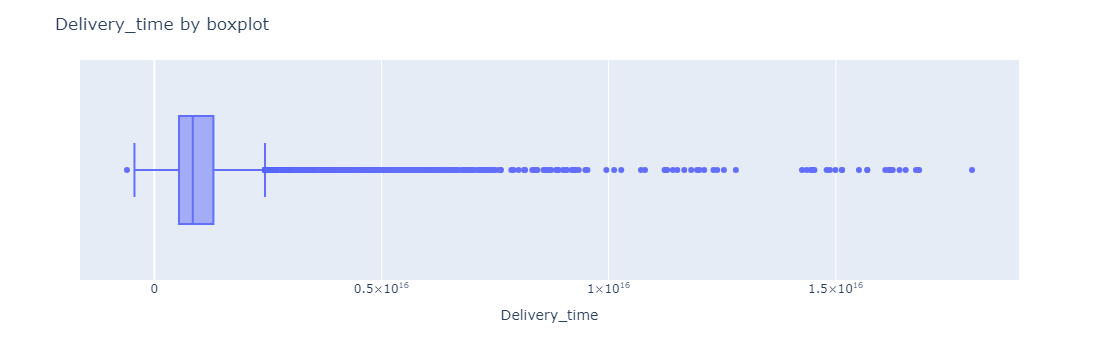

In [34]:
fig = px.box(data_frame=df_delivered, x="delivery_time")
fig.update_layout(
    title = "Delivery_time by boxplot",
    xaxis = dict(title="Delivery_time"),    
)
fig.show()

In [35]:
df_delivered["delivery_time"].describe()

count                         97900
mean     12 days 00:27:23.381511746
std       9 days 09:40:52.894417607
min               -7 days +00:14:54
25%          6 days 06:24:00.500000
50%                 9 days 18:43:22
75%         15 days 00:53:36.500000
max               208 days 08:07:53
Name: delivery_time, dtype: object

In [36]:
df_delivered2 = df_delivered.copy()

* delivery_time definition => order_delivered_customer_date - order_approved_at
    * delivery_time이 음수인 경우, approved_at 즉, 승인이 늦게 된 경우임을 확인할 수 있었다
    * 57개의 행 삭제 진행
        * elif 대체를 한다면, purchase_timestamp로 대체하는 것도 방법일 수 있다.
* boxplot은 나노초로 데이터가 나오기 때문에, 이를 days로 변환 진행,
  * upper fence가 약 28일로 확인
    * 각 지역의 평균 배송 시간이 30일을 넘기지 않는 것으로 확인이 되기에, 30일 이상의 데이터는 삭제
    * 4212개의 행 삭제 진행

In [43]:
import numpy as np
from datetime import timedelta

def transform_timedelta(nanoseconds):

    # 나노초를 timedelta로 변환
    timedelta_obj = timedelta(microseconds=nanoseconds // 1000)
    # timedelta를 이용하여 시간 간격 출력
    return timedelta_obj

# boxplot의 upper fence 기준
nanoseconds = 2.435895*10 ** 15
transform_timedelta(nanoseconds)

print(f"Time Interval: {timedelta_obj}")

Time Interval: 28 days, 4:38:15


In [38]:
# 배송 시간 30일 이상 데이터는 삭제

df_delivered2[df_delivered2["delivery_time"] >= pd.Timedelta(days=30)].index

Index([  207,   317,   318,   325,   386,   388,   417,   434,   443,   455,
       ...
       97728, 97737, 97761, 97764, 97793, 97830, 97845, 97865, 97872, 97884],
      dtype='int64', length=4212)

In [39]:
# 배송 시간이 음수인 데이터 삭제 (0포함)

df_delivered2[df_delivered2["delivery_time"] <= pd.Timedelta(minutes=0)].index

Index([ 1197,  4408,  4409,  5294,  5321,  5593,  8732,  9098, 11714, 12456,
       12457, 14052, 15082, 16723, 21757, 26294, 27000, 27918, 29487, 30157,
       31271, 33325, 33415, 34020, 34825, 36139, 36509, 39552, 44621, 45499,
       45596, 45878, 48321, 48322, 54883, 57828, 57937, 58764, 62491, 69970,
       71734, 73939, 75731, 76665, 79729, 79755, 81302, 81556, 82012, 83221,
       84807, 89373, 91496, 91965, 94274, 94904, 97248],
      dtype='int64')

In [40]:
# 배달 시간 30일 이상의 배송 데이터 삭제

df_delivered2.drop(index=df_delivered2[df_delivered2["delivery_time"] >= pd.Timedelta(days=30)].index, inplace=True)

In [41]:
# 배달 시간이 음수인 데이터 삭제

df_delivered2.drop(index=df_delivered2[df_delivered2["delivery_time"] <= pd.Timedelta(days=0)].index, inplace=True)

In [42]:
# 총 93631개의 행 데이터 잔존

df_delivered2.shape

(93631, 38)

### 데이터 계산 및 변환

* delivery_time 데이터를 Timedelta가 아닌 day의 정수 데이터로 변환

In [50]:
days_list = []

for time in df_delivered2["delivery_time"]:
    # timedelta 데이터를 초 단위로 변환   
    sec = time.total_seconds()

    # 초 단위를 일수로 변환
    days = sec // (24*3600)

    # 일수로 변환되고 남은 나머지 데이터 체크
    remaining_seconds = sec % (24*3600)

    # 남은 나머지 데이터로 시간 데이터로 변환
    hours = remaining_seconds // 3600

    # 남은 데이터를 분, 초 단위로 변환
    remaining_seconds %= 3600
    minutes = remaining_seconds // 60
    seconds = remaining_seconds % 60

    # 시간이 18시간이 넘어가면 days +1추가
    if (hours >= 18) & (minutes > 0):
        days += 1
        days_list.append(days)
    else:
        days_list.append(days)

In [51]:
df_delivered2["delivery_time_day"] = days_list

In [52]:
df_delivered2.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  8736140c61ea584cb4250074756d8f3b  ab8844663ae049fda8baf15fc928f47f   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
2    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
3    delivered      2017-10-23 23:26:46 2017-10-25 02:14:11   
4    delivered      2017-08-10 13:35:55 2017-08-10 13:50:09   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-08-17 15:28:33           2017-08-18 14:44:43   
2          2017-08-04 17:35:43           2017-08-07 18:30:01   
3          2017-10-27 16:48:46           2017-11-07 18:04:59   
4          2017-08-11 13:52:35           2017-08-16 19:03:36   

  order_estimated_delivery_date estimate_delivery_time_diff    delivery_time  \
0                    2017-10-18             7 days 02:34:47  8 days 10:17:58   
1                    2017-08-28             9 days 09:15:17  2 days 18:39:27   
2                    2017-08-15             7 days 05:29:59  4 days 23:46:46   
3                    2017-11-13             5 days 05:55:01 13 days 15:50:48   
4                    2017-08-23             6 days 04:56:24  6 days 05:13:27   

   ... seller_state customer_lat  customer_lng  seller_lat  seller_lng  \
0  ...           SP   -23.583452    -46.586284  -23.675542  -46.442547   
1  ...           SP   -23.564977    -46.536043  -23.675542  -46.442547   
2  ...           SP   -23.532175    -46.626106  -23.675542  -46.442547   
3  ...           SP   -27.553442    -48.500027  -23.675542  -46.442547   
4  ...           SP   -23.494316    -46.364539  -23.675542  -46.442547   

  payment_sequential          payment_type  payment_installments  \
0                  3  credit_card, voucher                     1   
1                  1           credit_card                     3   
2                  1           credit_card                     1   
3                  1                boleto                     1   
4                  1           credit_card                     1   

   payment_value  delivery_time_day  
0          38.71                8.0  
1          37.77                3.0  
2          37.77                5.0  
3          44.09               13.0  
4          83.69                6.0  

[5 rows x 39 columns]

* Olist 같은 경우 개인 or 사업장 등 다양한 판매자가 있기 때문에, seller의 위치와 customer의 위치가 중요하다.
* haversine 라이브러리를 활용하여 판매자 및 소비자 위,경도 데이터의 직선거리 데이터를 추가

In [53]:
import haversine

df_delivered2["seller_customer_distance_km"] = df_delivered2.apply(lambda x: haversine.haversine((x['seller_lat'], x['seller_lng']), (x['customer_lat'], x['customer_lng']), unit = 'km'), 
                                                                   axis=1)

* 휴일 및 공휴일의 변수를 추가하기 위해 weekday 데이터 추가
* 월별로 배송시간 막대 그래프를 그렸을 때, 월별로 차이가 발생했기 때문에, month 데이터 추가
* 배송 물건의 부피 및 무게도 배송 시간에 영향이 있을 것으로 추정
    * 무게 데이터는 이미 존재하기 때문에, 부피 공식을 활용하여 volume 데이터 추가

In [54]:
df_delivered2["order_purchase_month"] = df_delivered2["order_purchase_timestamp"].dt.month

In [55]:
df_delivered2["order_purchase_weekday"] = df_delivered2["order_purchase_timestamp"].dt.weekday

In [56]:
df_delivered2["product_volume_g"] = round((df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm'])/6000 * 1000, 1)

In [57]:
df_delivered2

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2      0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3      bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4      8736140c61ea584cb4250074756d8f3b  ab8844663ae049fda8baf15fc928f47f   
...                                 ...                               ...   
97902  8cca5f9f04056cb2d8abb9b845e89b62  7573237856d19beef367370dd2285f37   
97903  c003c1face3c31cba0af4ab5314f3332  3338d6f3767b6853a4ec283edc2a7b21   
97904  1e13bca551a3fd095b40e24798569805  423852dab82b7c8333f71b06f3a6fd77   
97905  4442d1fdf454197e9e141f0d83a9031e  3c3c45651f50bb4b13a4de268cad02b0   
97906  5c533da06d7dfe10d9d44dbcc8bdbc6b  1285e7456591a89200ad22c4015c09ea   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
2        delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
3        delivered      2017-10-23 23:26:46 2017-10-25 02:14:11   
4        delivered      2017-08-10 13:35:55 2017-08-10 13:50:09   
...            ...                      ...                 ...   
97902    delivered      2018-05-12 07:21:13 2018-05-12 07:35:42   
97903    delivered      2017-08-07 10:50:46 2017-08-07 11:05:09   
97904    delivered      2018-03-21 11:17:37 2018-03-21 11:30:19   
97905    delivered      2017-02-03 18:08:16 2017-02-04 07:01:55   
97906    delivered      2017-07-02 13:10:36 2017-07-02 13:25:09   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2017-08-17 15:28:33           2017-08-18 14:44:43   
2              2017-08-04 17:35:43           2017-08-07 18:30:01   
3              2017-10-27 16:48:46           2017-11-07 18:04:59   
4              2017-08-11 13:52:35           2017-08-16 19:03:36   
...                            ...                           ...   
97902          2018-05-14 14:59:00           2018-05-18 20:44:31   
97903          2017-08-18 16:20:09           2017-08-21 21:16:43   
97904          2018-03-23 02:18:55           2018-03-28 16:53:38   
97905          2017-02-20 10:49:53           2017-03-01 11:24:45   
97906          2017-07-07 17:39:39           2017-07-26 22:53:20   

      order_estimated_delivery_date estimate_delivery_time_diff  \
0                        2017-10-18             7 days 02:34:47   
1                        2017-08-28             9 days 09:15:17   
2                        2017-08-15             7 days 05:29:59   
3                        2017-11-13             5 days 05:55:01   
4                        2017-08-23             6 days 04:56:24   
...                             ...                         ...   
97902                    2018-06-04            16 days 03:15:29   
97903                    2017-08-25             3 days 02:43:17   
97904                    2018-04-19            21 days 07:06:22   
97905                    2017-03-06             4 days 12:35:15   
97906                    2017-08-02             6 days 01:06:40   

         delivery_time  ... seller_lng payment_sequential  \
0      8 days 10:17:58  ... -46.442547                  3   
1      2 days 18:39:27  ... -46.442547                  1   
2      4 days 23:46:46  ... -46.442547                  1   
3     13 days 15:50:48  ... -46.442547                  1   
4      6 days 05:13:27  ... -46.442547                  1   
...                ...  ...        ...                ...   
97902  6 days 13:08:49  ... -41.486181                  1   
97903 14 days 10:11:34  ... -46.184544                  1   
97904  7 days 05:23:19  ... -43.953089                  1   
97905 25 days 04:22:50  ... -46.394785                  1   
97906 24

In [59]:
df_delivered2.to_csv('./Data/df_delivered_processing.csv', index=False)

## Modeling_estimate_delivery_time

In [89]:
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
df = pd.read_csv('./Data/df_delivered_processing.csv')
df.shape

(93631, 43)

In [98]:
cols = ["customer_city", "customer_state", "seller_state", "product_category_name", 
        "price", "freight_value", "product_weight_g", "product_volume_g",  
        "seller_customer_distance_km", "order_purchase_month", "order_purchase_weekday", "delivery_time_day"]

In [100]:
df_delivery = df[cols].copy()

In [101]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93631 entries, 0 to 93630
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_city                93631 non-null  object 
 1   customer_state               93631 non-null  object 
 2   seller_state                 93631 non-null  object 
 3   product_category_name        93631 non-null  object 
 4   price                        93631 non-null  float64
 5   freight_value                93631 non-null  float64
 6   product_weight_g             93631 non-null  float64
 7   product_volume_g             93631 non-null  float64
 8   seller_customer_distance_km  93631 non-null  float64
 9   order_purchase_month         93631 non-null  int64  
 10  order_purchase_weekday       93631 non-null  int64  
 11  delivery_time_day            93631 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 8.6+ MB


### OneHot Encoding

In [102]:
ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]

def onehot_encoding(df, ctg_col_list):
    df_ml = df.copy()
    df_oh = pd.get_dummies(df_ml, columns=ctg_col_list)
    
    return df_oh

df_delivery_oh = onehot_encoding(df_delivery, ctg_col_list)

In [92]:
model_gbr = GradientBoostingRegressor()
model_knr = KNeighborsRegressor()
model_tr = DecisionTreeRegressor()
model_xgbr = XGBRegressor()
model_rf = RandomForestRegressor()
model_cb = CatBoostRegressor()

model_list = [model_gbr, model_knr, model_tr, model_xgbr, model_rf, model_cb]
model_name_list = ["GradientBoostingRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "XGBRegressor","RandomForestRegressor", "CatBoostRegressor"]

df_x = df_delivery_oh.drop(columns="delivery_time_day")
df_y = df_delivery_oh["delivery_time_day"]

def def_modeling_list(df_x, df_y, model_list, model_name_list):

    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    mae_list = []
    mse_list = []
    
    for model, name in zip(model_list, model_name_list):
        start_time = datetime.now()
        print("start Time : ", start_time)
        model.fit(X_train, y_train)
        print("Modeling Complete!")
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        end_time = datetime.now()
        print("end Time : ", end_time)
        print("loading Time : ", end_time-start_time)
        print(f"Model: {name}, MAE : {mae}, MSE : {mse}")
        mae_list.append(mae)
        mse_list.append(mse)
        print("-"*30)

    result = pd.DataFrame({"Model_name" : model_name_list, "MAE" : mae_list, "MSE" : mse_list})
    return result

def_modeling_list(df_x, df_y, model_list, model_name_list)

(74904, 4041) (18727, 4041) (74904,) (18727,)
start Time :  2024-01-30 00:40:47.414890
Modeling Complete!
end Time :  2024-01-30 00:44:15.200769
loading Time :  0:03:27.785879
Model: GradientBoostingRegressor, MAE : 3.7408688300517543, MSE : 23.76622728662098
------------------------------
start Time :  2024-01-30 00:44:15.200769
Modeling Complete!
end Time :  2024-01-30 00:44:51.148366
loading Time :  0:00:35.947597
Model: KNeighborsRegressor, MAE : 4.307758850857051, MSE : 31.684239867570888
------------------------------
start Time :  2024-01-30 00:44:51.149338
Modeling Complete!
end Time :  2024-01-30 00:45:00.110147
loading Time :  0:00:08.960809
Model: DecisionTreeRegressor, MAE : 4.7119399797084425, MSE : 41.72255299834464
------------------------------
start Time :  2024-01-30 00:45:00.110147
Modeling Complete!
end Time :  2024-01-30 00:45:19.817117
loading Time :  0:00:19.706970
Model: XGBRegressor, MAE : 3.6168458825812273, MSE : 22.555960979193106
---------------------------

Model_name       MAE        MSE
0  GradientBoostingRegressor  3.740869  23.766227
1        KNeighborsRegressor  4.307759  31.684240
2      DecisionTreeRegressor  4.711940  41.722553
3               XGBRegressor  3.616846  22.555961
4      RandomForestRegressor  3.543517  22.414008
5          CatBoostRegressor  3.598272  22.308145

### Label encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]

def label_encoding(df, ctg_col_list):
    df_lb = df.copy()

    for col in ctg_col_list:
        le = LabelEncoder()
        df_lb[col + "_encoded"] = le.fit_transform(df_lb[col])
        df_lb.drop(columns=col, inplace=True)
    
    return df_lb

df_delivery_lb = label_encoding(df_delivery, ctg_col_list)

In [94]:
model_gbr = GradientBoostingRegressor()
model_knr = KNeighborsRegressor()
model_tr = DecisionTreeRegressor()
model_xgbr = XGBRegressor()
model_rf = RandomForestRegressor()
model_cb = CatBoostRegressor()

model_list = [model_gbr, model_knr, model_tr, model_xgbr, model_rf, model_cb]
model_name_list = ["GradientBoostingRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "XGBRegressor","RandomForestRegressor", "CatBoostRegressor"]

df_x = df_delivery_lb.drop(columns="delivery_time_day")
df_y = df_delivery_lb["delivery_time_day"]

def_modeling_list(df_x, df_y, model_list, model_name_list)

(74904, 11) (18727, 11) (74904,) (18727,)
start Time :  2024-01-30 00:55:59.272353
Modeling Complete!
end Time :  2024-01-30 00:56:12.502125
loading Time :  0:00:13.229772
Model: GradientBoostingRegressor, MAE : 3.757093790963205, MSE : 23.924839686241864
------------------------------
start Time :  2024-01-30 00:56:12.502125
Modeling Complete!
end Time :  2024-01-30 00:56:12.837492
loading Time :  0:00:00.335367
Model: KNeighborsRegressor, MAE : 4.390014417685696, MSE : 32.63671703956854
------------------------------
start Time :  2024-01-30 00:56:12.837492
Modeling Complete!
end Time :  2024-01-30 00:56:14.101321
loading Time :  0:00:01.263829
Model: DecisionTreeRegressor, MAE : 4.931533792563322, MSE : 45.65805907097892
------------------------------
start Time :  2024-01-30 00:56:14.101321
Modeling Complete!
end Time :  2024-01-30 00:56:14.269694
loading Time :  0:00:00.168373
Model: XGBRegressor, MAE : 3.5901897085033174, MSE : 22.38893613324595
------------------------------
sta

Model_name       MAE        MSE
0  GradientBoostingRegressor  3.757094  23.924840
1        KNeighborsRegressor  4.390014  32.636717
2      DecisionTreeRegressor  4.931534  45.658059
3               XGBRegressor  3.590190  22.388936
4      RandomForestRegressor  3.629769  22.800669
5          CatBoostRegressor  3.578949  22.152062

## Modeling_freight_value 

In [107]:
df.head(1)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date estimate_delivery_time_diff    delivery_time  \
0                    2017-10-18             7 days 02:34:47  8 days 10:17:58   

   ... seller_lng payment_sequential          payment_type  \
0  ... -46.442547                  3  credit_card, voucher   

   payment_installments  payment_value delivery_time_day  \
0                     1          38.71               8.0   

   seller_customer_distance_km  order_purchase_month  order_purchase_weekday  \
0                    17.867985                    10                       0   

   product_volume_g  
0             329.3  

[1 rows x 43 columns]

In [108]:
cols = ["customer_city", "customer_state", "seller_state", "product_category_name", 
        "price", "freight_value", "product_weight_g", "product_volume_g", 
        "seller_customer_distance_km", "order_purchase_month", "order_purchase_weekday"]

In [110]:
df_freight = df[cols].copy()

### OneHot Encoding

In [111]:
ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]

df_freight_oh = onehot_encoding(df_freight, ctg_col_list)

In [112]:
model_gbr = GradientBoostingRegressor()
model_knr = KNeighborsRegressor()
model_tr = DecisionTreeRegressor()
model_xgbr = XGBRegressor()
model_rf = RandomForestRegressor()
model_cb = CatBoostRegressor()

model_list = [model_gbr, model_knr, model_tr, model_xgbr, model_rf, model_cb]
model_name_list = ["GradientBoostingRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "XGBRegressor","RandomForestRegressor", "CatBoostRegressor"]

df_x = df_freight_oh.drop(columns="freight_value")
df_y = df_freight_oh["freight_value"]

def_modeling_list(df_x, df_y, model_list, model_name_list)

(74904, 4040) (18727, 4040) (74904,) (18727,)
start Time :  2024-01-30 01:06:29.044331
Modeling Complete!
end Time :  2024-01-30 01:09:52.936642
loading Time :  0:03:23.892311
Model: GradientBoostingRegressor, MAE : 4.0494526070340715, MSE : 66.80267488998135
------------------------------
start Time :  2024-01-30 01:09:52.937638
Modeling Complete!
end Time :  2024-01-30 01:10:28.526568
loading Time :  0:00:35.588930
Model: KNeighborsRegressor, MAE : 4.38985721151279, MSE : 82.11835559865435
------------------------------
start Time :  2024-01-30 01:10:28.527568
Modeling Complete!
end Time :  2024-01-30 01:10:38.372758
loading Time :  0:00:09.845190
Model: DecisionTreeRegressor, MAE : 4.256047863156583, MSE : 111.41641167194722
------------------------------
start Time :  2024-01-30 01:10:38.372758
Modeling Complete!
end Time :  2024-01-30 01:10:58.062503
loading Time :  0:00:19.689745
Model: XGBRegressor, MAE : 3.7271363633156214, MSE : 60.615006471258084
-----------------------------

Model_name       MAE         MSE
0  GradientBoostingRegressor  4.049453   66.802675
1        KNeighborsRegressor  4.389857   82.118356
2      DecisionTreeRegressor  4.256048  111.416412
3               XGBRegressor  3.727136   60.615006
4      RandomForestRegressor  3.308671   57.839901
5          CatBoostRegressor  3.724440   59.186143

### Label Encoding

In [114]:
ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]

df_freight_lb = label_encoding(df_freight, ctg_col_list)

In [115]:
model_gbr = GradientBoostingRegressor()
model_knr = KNeighborsRegressor()
model_tr = DecisionTreeRegressor()
model_xgbr = XGBRegressor()
model_rf = RandomForestRegressor()
model_cb = CatBoostRegressor()

model_list = [model_gbr, model_knr, model_tr, model_xgbr, model_rf, model_cb]
model_name_list = ["GradientBoostingRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "XGBRegressor","RandomForestRegressor", "CatBoostRegressor"]

df_x = df_freight_lb.drop(columns="freight_value")
df_y = df_freight_lb["freight_value"]

def_modeling_list(df_x, df_y, model_list, model_name_list)

(74904, 10) (18727, 10) (74904,) (18727,)
start Time :  2024-01-30 01:21:37.871660
Modeling Complete!
end Time :  2024-01-30 01:21:49.188876
loading Time :  0:00:11.317216
Model: GradientBoostingRegressor, MAE : 4.035906076947771, MSE : 66.9039685550558
------------------------------
start Time :  2024-01-30 01:21:49.188876
Modeling Complete!
end Time :  2024-01-30 01:21:49.479911
loading Time :  0:00:00.291035
Model: KNeighborsRegressor, MAE : 4.589030490735302, MSE : 86.73852389234794
------------------------------
start Time :  2024-01-30 01:21:49.480943
Modeling Complete!
end Time :  2024-01-30 01:21:50.538589
loading Time :  0:00:01.057646
Model: DecisionTreeRegressor, MAE : 4.662883626136949, MSE : 117.10551894338535
------------------------------
start Time :  2024-01-30 01:21:50.538589
Modeling Complete!
end Time :  2024-01-30 01:21:50.689427
loading Time :  0:00:00.150838
Model: XGBRegressor, MAE : 3.5371639011824243, MSE : 57.00672619009126
------------------------------
star

Model_name       MAE         MSE
0  GradientBoostingRegressor  4.035906   66.903969
1        KNeighborsRegressor  4.589030   86.738524
2      DecisionTreeRegressor  4.662884  117.105519
3               XGBRegressor  3.537164   57.006726
4      RandomForestRegressor  3.419129   56.900419
5          CatBoostRegressor  3.541806   56.059194

## Result

* 이상치에 덜 민감한 MAE를 평가 기준으로 진행
* MAE 기준으로 Onehot Encoding을 사용한 RandomForest 모델이 배달 시간 및 배송비 예측에 좋은 성능을 보였다.
* 배달 시간 예측 모델 오차 RandomForestRegressor → 3.543517, 약 3.5일의 오차
* 배송비 예측 모델 오차 RandomForestRegressor → 3.308671, 약 3.1 R$의 오차

In [ ]:
# from sklearn.model_selection import GridSearchCV

# start_time = datetime.now()
# print("start Time : ", start_time)

# X = df_delivered2_ml_x.drop(columns="freight_value")
# y = df_delivered2_ml_x["freight_value"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor()

# param_grid = {
#     "n_estimators" : [50, 100, 200],
#     "max_depth" : [None, 10, 20],
#     "min_samples_split" : [2, 5, 10],
#     "min_samples_leaf" : [1, 2, 4]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error'}, refit='mae', return_train_score=True)

# grid_search.fit(X_train, y_train)
# print("Best Hyperparameters:", grid_search.best_params_)

# end_time = datetime.now()
# print("complete time : ", end_time)
# print('-'*30)
# print("loading : ", end_time - start_time)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"mae : {mae}, mse : {mse}")